# Lecture 7: Finding, Using, and Visualizing FAIR Data 
ENVR 890-010: Python for Environmental Research, Fall 2020

October 8, 2021

By Andrew Hamilton, edited by Rosa Cuppari. Some material adapted from Matthew Huber & Ashley Dicks (Purdue University).

Acknowledgement to Drs. Venkatesh Merwade, Matthew Huber, Carol Song, and Lan Zhao at Purdue University, and the FACT Cyber Training Fellowship (funded under NSF Award #1829764), for training Andrew in FAIR data and science best practices. 

### Summary
The use and production of data is fundamental to all research, including environmental science, engineering, and health. Data are stored in a wide variety of formats and locations, from curated online databases to individual spreadsheets to pdf tables. In this lesson, we will learn how to download data from a number of online repositories in order to use in our research. We will also learn about FAIR data standards and best practices for making your own data available to other researchers.

We will then begin learning about how to visualize this data in order to communicate insights and results from data analysis.

### Major public environmental data sources
1. [USGS National Water Information System](https://waterdata.usgs.gov/nwis)
    - Stream flow, water quality, water use, etc.
    - Usually easier to search for specific location (e.g., [Bolin Creek](https://waterdata.usgs.gov/nwis/uv?site_no=0209734440))
1. [Natural Resources Conservation Service (NRCS)](https://www.wcc.nrcs.usda.gov/snow/)
    - Snow depth, water supply forecasts, etc.
1. [NOAA National Centers for Environmental Information](https://www.ncdc.noaa.gov/data-access)
    - Historical weather data, severe weather database, etc.
1. [EPA Air Data](https://www.epa.gov/outdoor-air-quality-data)
    - Current & historical air quality data
    - Automated plot generation & data downloads
1. [EPA Dataset Giveaway](https://edg.epa.gov/metadata/catalog/main/home.page)
    - Many different datasets on climate change, locations of Superfund sites, environmental justice, etc.
1. [CDC National Center for Environmental Health](https://www.cdc.gov/nceh/data.htm)
    - Many datasets about asthma, lead poisoning, nutrition, etc.
1. [Organization for Co-operation and Economic Development (OECD) Data](https://data.oecd.org/)
    - Country-scale data on environment (air pollution, water withdrawals, CO2 emissions, etc.)
    - Energy, healthcare, development, etc.
1. [The National Map (USGS)](https://viewer.nationalmap.gov/basic/)
    - National Hydrography Dataset
    - Digital Elevation Maps
    - Place names, transportation networks
1. [Multi-Resolution Land Characteristics Consortium (MRLC)](https://www.mrlc.gov/data?f%5B0%5D=category%3Aland%20cover)
    - Land use/land cover datasets
1. [National Center for Atmospheric Research (NCAR) Research Data Archive](https://rda.ucar.edu/)
    - Tons of gridded oceanic & atmospheric datasets & reanalyses

### 4 ways to upload data into Python
1. Download csv/xlsx, and use ``pd.read_csv()``, ``pd.read_excel()``

1. Copy online table into Excel, then follow #1
    - e.g., USGS "Tab-separated" output format
    
1. Using special Python APIs
    - [EPA Envirofacts Data Service API](https://www.epa.gov/enviro/web-services)
    - These APIs can be pretty tricky to use, and each one will be different. They often require special python packages and/or an account with the provider. But if you need to download a lot of different datasets, or get updated data regularly, it may be worthwhile to figure out.
    - [Here](https://techrando.com/2019/07/04/how-to-use-the-environmental-protection-agencys-epas-api-to-pull-data/) is an example of how to use with EPA Envirofacts, but I haven't actually used it.
    - [Here](http://kapadia.github.io/usgs/) is a package for interfacing with the USGS API, but I haven't used this either.
    
1. Query online table directly using url (often the most convenient)

We will use USGS streamflow data from Bolin Creek in Chapel Hill, NC. If you click on the Bolin Creek link above on the USGS website, you will find information about how to download data from this location. One of the options for any query is to get data in csv format, which will open a new browser window with a table of data. For example, [here](https://nwis.waterdata.usgs.gov/nwis/uv?cb_00060=on&cb_00065=on&format=rdb&site_no=0209734440&period=&begin_date=2019-10-02&end_date=2020-10-09). Pandas allows us to access this webpage and access the data directly, rather than having to first save a csv file to our computer:

In [6]:
import pandas as pd
import numpy as np

In [9]:
### Use USGS Bolin Creek website to get tab-separated data. Fill in address, header, and delimiter
data_address = 'https://nwis.waterdata.usgs.gov/nwis/uv?cb_00060=on&cb_00065=on&format=rdb&site_no=0209734440&period=&begin_date=2019-10-02&end_date=2020-10-09'
header = 30
delimiter = '\t'
df = pd.read_csv(data_address, header=header, delimiter=delimiter)

In [8]:
df = df.iloc[1:, :]
df

,agency_cd,site_no,datetime,tz_cd,89527_00065,89527_00065_cd,89528_00060,89528_00060_cd
1,USGS,0209734440,2015-10-02 00:00,EDT,2.10,A,4.18,A
2,USGS,0209734440,2015-10-02 00:15,EDT,2.10,A,4.18,A
3,USGS,0209734440,2015-10-02 00:30,EDT,2.11,A,4.36,A
4,USGS,0209734440,2015-10-02 00:45,EDT,2.11,A,4.36,A
5,USGS,0209734440,2015-10-02 01:00,EDT,2.11,A,4.36,A
...,...,...,...,...,...,...,...,...
174810,USGS,209734440,2020-10-09 22:45,EDT,1.62,A,1.19,A
174811,USGS,209734440,2020-10-09 23:00,EDT,1.61,A,1.1,A
174812,USGS,209734440,2020-10-09 23:15,EDT,1.61,A,1.1,A
174813,USGS,209734440,2020-10-09 23:30,EDT,1.61,A,1.1,A


Once you have an example url, you can often figure out how to automatically get data for new dates or locations. For example, how would you change the query to download data from January 1, 2015, to the present?

In [4]:
## To save the data for later, use pandas to_csv()
df.to_csv('bolin_creek.csv', sep=',', index=False)

### FAIR research
<img src="stall_fair.PNG" style="width: 400px;" />(Image cred: Stall, 2018)

**FAIR** data is:
- **F**indable: The datasets and resources should be easily located by humans and computers
- **A**ccessible: After the dataset is found, the user needs to be able to easily access the datasets
- **I**nteroperable: The datasets need to be in a format that is usable by others, therefore needs to satisfy the following 
- **R**eusable: The datasets need to be able to be used by various people, therefore must have clear metadata

<img src="wilkinson2016_box2.PNG" style="width: 800px;" />(Image cred: Wilkinson et al., 2016)

<img src="huber_fair.PNG" style="width: 600px;" />(Image cred: Matthew Huber et al., [*MyGeoHub*](https://mygeohub.org/cybertraining))

<img src="stall_dataChallenges.PNG" style="width: 800px;" />(Image cred: Stall, 2018)

<img src="rosenberg2020_fig1.PNG" style="width: 600px;" />(Image cred: Rosenberg et al., 2020)

<img src="hutton2016_fig1.PNG" style="width: 800px;" />(Image cred: Hutton et al., 2016)

<img src="stall_dataEcosystem.PNG" style="width: 600px;" />(Image cred: Stall, 2018)

### One way to use our data: visualization

No matter what type of research you do (lab experiments, public surveys, computer modeling, etc.), data visualization is a crucial skill. Programming languages like Python give us a high degree of flexibility and allow us to tailor our visualization to the data at hand. Today we will learn the basics of how to set up figures, and then go through many examples of different types of plots and customizations.

The main plotting package for Python is ``matplotlib``, and its ``pyplot`` module, which is typically imported with the alias ``plt``. Another helpful library which we will use later in the lecture is ``seaborn``, typically imported as ``sns``

In [10]:
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
## adjust default plot font size
matplotlib.rcParams.update({'font.size': 18})

The most important arguments to any plotting function are the data. For our first example, let's plot two simple parabolas.


In [12]:
def parabola(a, b, c, x):
    return a + b * x + c * x **2

X = np.arange(-10, 10)
X

array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
         3,   4,   5,   6,   7,   8,   9])

In [13]:
Y1 = [parabola(-2, 0, 1, x) for x in X]
Y2 = [parabola(5, -2, -0.5, x) for x in X]
Y2

[-25.0,
 -17.5,
 -11.0,
 -5.5,
 -1.0,
 2.5,
 5.0,
 6.5,
 7.0,
 6.5,
 5.0,
 2.5,
 -1.0,
 -5.5,
 -11.0,
 -17.5,
 -25.0,
 -33.5,
 -43.0,
 -53.5]

Now let's plot these two y variables over the domain of x.


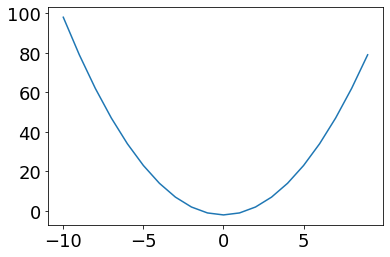

In [16]:
### plot Y1
plt.plot(X, Y1)

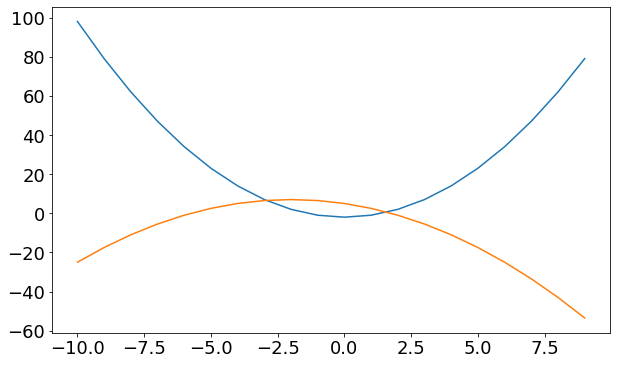

In [17]:
### plot Y1 & Y2 together, and fix figure size
fig = plt.figure(figsize = (10, 6))
plt.plot(X, Y1)
plt.plot(X, Y2)

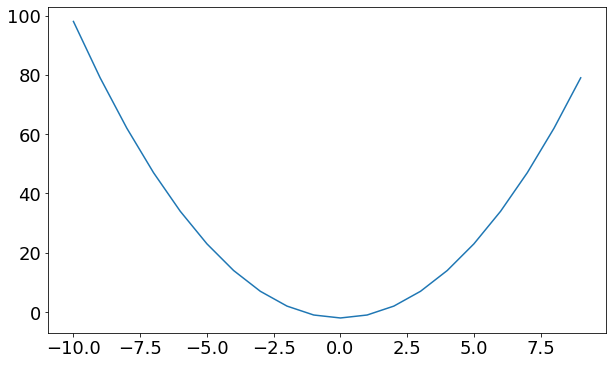

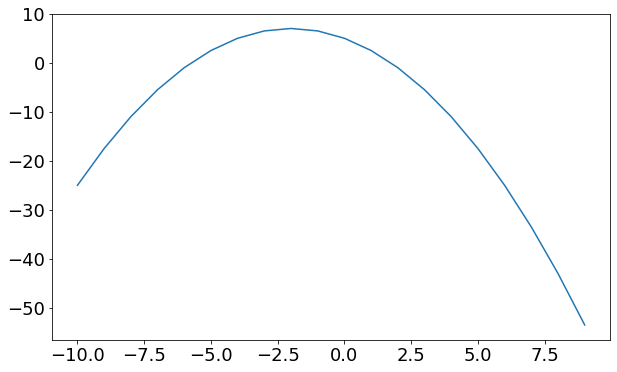

In [18]:
### plot Y1 & Y2 separately from 1 cell
fig = plt.figure(figsize = (10, 6))
plt.plot(X, Y1)
fig = plt.figure(figsize = (10, 6))
plt.plot(X, Y2)

Now let's add some custom x and y labels, as well as a legend.

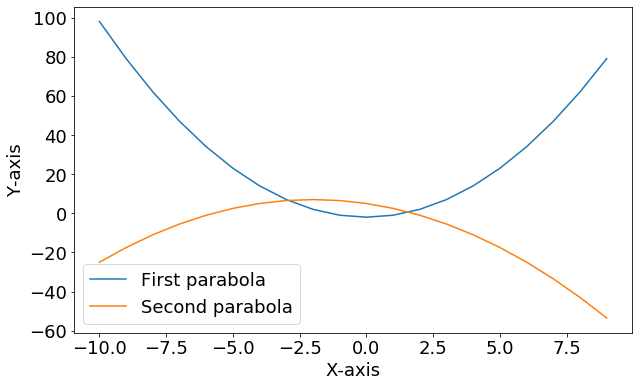

In [19]:
fig = plt.figure(figsize = (10, 6))
plt.plot(X, Y1, label='First parabola')
plt.plot(X, Y2, label='Second parabola')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()

We can also customize the line's color, style, thickness, transparency, etc., and change the legend location. Many more colors here, and other options for plot here.

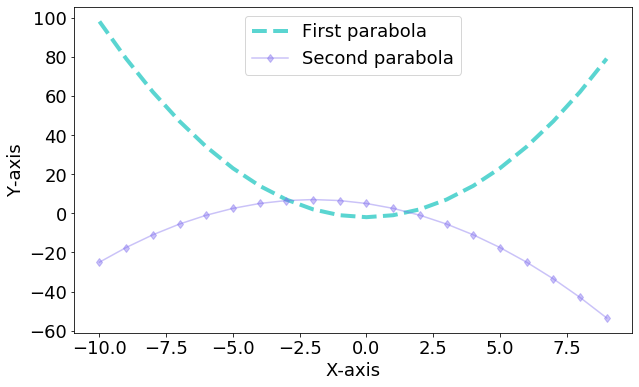

In [20]:
fig = plt.figure(figsize = (10, 6))
plt.plot(X, Y1, label='First parabola', color='mediumturquoise', linestyle='--', linewidth=4, alpha=0.9)
plt.plot(X, Y2, label='Second parabola', color='mediumslateblue', marker='d', alpha=0.4)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='upper center')

### In-class exercise
Let's create some fake data to represent annual snowfall in two locations, one colder and one warmer.
1. Create an x variable that includes the integers from 1920 to 2020.
1. Create one y variable that is random draws from an [exponential distribution](https://numpy.org/doc/stable/reference/random/generated/numpy.random.exponential.html) with a scale parameter of 10, with the same length as x. (this is the colder climate)
1. Create a second y variable that is random draws from a [lognormal distribution](https://numpy.org/doc/stable/reference/random/generated/numpy.random.lognormal.html) with a mean of 0.5 and a standard deviation of 1, with the same length as x. (this is the warmer climate)
1. Plot both time series. Label the x axis "Year" and the y axis "Annual snowfall (inches)". Create a legend where the first series is labeled "Colder" and the second is labeled "Warmer". Color them using colder and warmer-looking colors of your choice.



### Importing and cleaning real data
Let's read in some Chapel Hill weather data (from NOAA National Climate Data Center, https://www.ncdc.noaa.gov/cdo-web/datasets/GHCND/stations/GHCND:USC00311677/detail)

In [ ]:
### read in data. ignore first row ("header") where I have written info about where data was downloaded.
df = pd.read_csv('chapel_hill_weather.csv', header = 1)
df

In [ ]:
### Organize data
## rename columns
df.columns = ['station', 'name', 'date', 'precip', 'snow', 'tmax', 'tmin']
df

In [ ]:
## convert date column to datetime type
df.date = pd.to_datetime(df['date'])
df

In [ ]:
# index by date
df.index = df['date']
# remove unnecessary columns
df = df.loc[:, ['precip', 'snow', 'tmax', 'tmin']]
df

In [ ]:
## Get year, month, day for each
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df

In [ ]:
## Only keep data since 1970
df = df.loc[df['year'] >= 1970, :]
df

In [ ]:
### Clean data
# remove NANs by assuming previous value (note, this is not the most sophisticated way to fill data)
nrows = df.shape[0]
ncols = df.shape[1]
np.isnan(df)

In [ ]:
print("Fraction of nan's before:")
print(np.isnan(df).sum(axis=0) / nrows)
print()

In [ ]:
### replace nan's with previous value in time
for i in range(nrows):
    for j in range(ncols):
        if np.isnan(df.iloc[i, j]):
            df.iloc[i, j] = df.iloc[i - 1, j]
            
print("Fraction of nan's after:")
print(np.isnan(df).sum(axis=0) / nrows)

In [ ]:
### Plot data as time series
plt.plot(df.precip)

In [ ]:
plt.plot(df.snow)

In [ ]:
plt.plot(df.tmax)

In [ ]:
plt.plot(df.tmin)

In [ ]:
## Looks like a bad data value - tmin probably wasn't >120 in January
df.loc[df.tmin > 100, :]

In [ ]:
## Let's look at that data in context of neighbors
i = np.argmax(df.tmin)
print(i)
df.iloc[(i - 2):(i + 3), :]

In [ ]:
## Let's reset that value based on previous value (note: you could also do average, or leave blank)
df.iloc[i, 3] = df.iloc[i - 1, 3]
df.iloc[(i - 2):(i + 3), :]
### Note: this particular warning about "setting a value based on a copy of a slice" occurs a lot, personally I ignore it

In [ ]:
plt.plot(df.tmin)

### Many ways to visualize

In [ ]:
## Function for plotting time series over period
def plot_weather(df, colname, ylabel, startyear=df.year.min(), endyear=df.year.max()):
    data = df.loc[(df['year'] >= startyear) & (df['year'] <= endyear), colname]
    fig = plt.figure(figsize = (12,8))
    plt.plot(data)
    plt.xlabel('Year')
    plt.ylabel(ylabel)

In [ ]:
plot_weather(df, 'precip', 'Precip (mm)')

In [ ]:
plot_weather(df, 'precip', 'Precip (mm)', 1998, 2002)

In [ ]:
plot_weather(df, 'snow', 'Snow (mm)', 1998, 2002)

In [ ]:
## Function for plotting multiple time series over period
def plot_weather_multi(df, colnames, ylabel, startyear=df.year.min(), endyear=df.year.max()):
    data = df.loc[(df['year'] >= startyear) & (df['year'] <= endyear)]
    fig = plt.figure(figsize = (12,8))
    for colname in colnames:
        plt.plot(data[colname], label=colname)
    plt.xlabel('Year')
    plt.ylabel(ylabel)
    plt.legend()

In [ ]:
plot_weather_multi(df, ['tmin', 'tmax'], 'Temperature (F)', 1998, 2002)

In [ ]:
## How do min and max temperatures compare? Scatterplot.
fig = plt.figure(figsize = (12,8))
plt.scatter(df['tmin'], df['tmax'])
plt.xlabel('tmin')
plt.ylabel('tmax')

In [ ]:
## customizing with color and transparency
fig = plt.figure(figsize = (12,8))
plt.scatter(df['tmin'], df['tmax'], color='k', alpha=0.1)
plt.xlabel('tmin')
plt.ylabel('tmax')

In [ ]:
## what about scattering by month?
markers = ['o', '<', '^', '>', '<', 's', 'p', 'P', '*', 'h', 'X', 'D']
colors = ['navy', 'mediumslateblue', 'turquoise', 'springgreen', 'forestgreen', 'greenyellow', 'yellow', 'gold', 'orange', 'orangered', 'firebrick', 'mediumvioletred']
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

fig = plt.figure(figsize = (12,8))
for i in range(12):
    data = df.loc[df['month'] == (i+1), :]
    plt.scatter(data['tmin'], data['tmax'], color=colors[i], marker=markers[i], alpha=0.3, label=months[i])
plt.xlabel('tmin')
plt.ylabel('tmax')
plt.legend()

In [ ]:
## histogram of tmin vs tmax
fig = plt.figure(figsize = (12,8))
plt.hist(df['tmin'], color='b', alpha=0.5, label='tmin')
plt.hist(df['tmax'], color='r', alpha=0.5, label='tmax')
plt.xlabel('Temperature (F)')
plt.ylabel('Count')
plt.legend()

In [ ]:
## histogram of tmax by season. Use "density" to make sure all have equal area.
seasons = ['winter', 'spring', 'summer', 'fall']
season_months =  {'winter': [0, 1, 11],
           'spring': [2, 3, 4],
           'summer': [5, 6, 7],
           'fall': [8, 9, 10]}
colors = {'winter': 'navy', 
          'spring': 'springgreen',
          'summer': 'gold',
          'fall': 'firebrick'}

fig = plt.figure(figsize = (12,8))
for k in seasons:
    is_season = [m in season_months[k] for m in df['month']]
    data = df.loc[is_season, :]
    plt.hist(data['tmax'], color=colors[k], density=True, alpha=0.4, label=k)
plt.xlabel('Max temperature (F)')
plt.ylabel('Density')
plt.legend()

In [ ]:
##### seaborn is another plotting package with some nice clean functions. plays nice with matplotlib parameters.
## kde plot
fig = plt.figure(figsize = (12,8))
for k in seasons:
    is_season = [m in season_months[k] for m in df['month']]
    data = df.loc[is_season, :]
    sns.kdeplot(data['tmax'], color=colors[k], shade=True, label=k)
plt.xlabel('Max temperature (F)')
plt.ylabel('Density')
plt.legend()

In [ ]:
## boxplots
sns.boxplot(x = df['month'], y = df['tmax'])
plt.legend

In [ ]:
## violin plots
## alternatively with seaborn, can just write colnames. We can also specify tick labels.
sns.violinplot(x = 'month', y = 'tmax', data = df, color = 'lightgrey')
plt.xlabel('Month')
plt.ylabel('Max temperature (F)')

In [ ]:
## Grouping data using the "groupby" function
df_monthly_mean = df.groupby('month').mean()
df_monthly_mean

In [ ]:
## plot by month with different line styles. Also replace x label ticks.
plt.plot(df_monthly_mean['tmax'], ls = ':', label='tmax')
plt.plot(df_monthly_mean['tmin'], ls = '--', label='tmin')
plt.legend()
ticks = plt.xticks(list(range(1, 13)), months, rotation=90)
plt.xlabel('Month')
plt.ylabel('Temperature (F)')

In [ ]:
df_annual_sum = df.groupby('year').sum()
df_annual_sum

In [ ]:
## Regression plot (we will cover regression in more detail next week)
sns.regplot(df_annual_sum.index, df_annual_sum['precip'], ci=90)

In [ ]:
## Stacking multiple plots
df_annual_max = df.groupby('year').max()
df_annual_min = df.groupby('year').min()
df_annual_selected = df_annual_max[['tmax']]
df_annual_selected['tmin'] = df_annual_min[['tmin']]
df_annual_selected.columns = ['tmax_max', 'tmin_min']
df_annual_selected

In [ ]:
fig, ((ax11, ax12), (ax21, ax22)) = plt.subplots(2, 2, figsize = (12, 12))
ax11.plot(df_annual_sum.index, df_annual_sum['precip'])
ax12.plot(df_annual_max.index, df_annual_max['precip'])
ax21.plot(df_annual_sum.index, df_annual_sum['snow'])
ax22.plot(df_annual_max.index, df_annual_max['snow'])

In [ ]:
## subplots with seaborn
fig, ((ax11, ax12), (ax21, ax22)) = plt.subplots(2, 2, figsize = (12, 12))
sns.regplot(df_annual_sum.index, df_annual_sum['precip'], ax=ax11)
sns.regplot(df_annual_max.index, df_annual_max['precip'], ax=ax12)
sns.regplot(df_annual_sum.index, df_annual_sum['snow'], ax=ax21)
sns.regplot(df_annual_max.index, df_annual_max['snow'], ax=ax22)

In [ ]:
## Adjusting spacing of plot
fig, ((ax11, ax12), (ax21, ax22)) = plt.subplots(2, 2, figsize = (12, 12))
fig.subplots_adjust(hspace=0.15, wspace=0.25)


sns.regplot(df_annual_sum.index, df_annual_sum['precip'], ax=ax11)
ax11.set_ylabel('Total precip (mm)')
ax11.set_xlabel('')
sns.regplot(df_annual_max.index, df_annual_max['precip'], ax=ax12)
ax12.set_ylabel('Max precip (mm)')
ax12.set_xlabel('')
sns.regplot(df_annual_sum.index, df_annual_sum['snow'], ax=ax21)
ax21.set_ylabel('Total snow (mm)')
ax21.set_xlabel('')
sns.regplot(df_annual_max.index, df_annual_max['snow'], ax=ax22)
ax22.set_ylabel('Max snow (mm)')
ax22.set_xlabel('')

In [ ]:
## pairplot
df_annual_combined = df_annual_sum.loc[:, ['precip', 'snow']].copy()
columns = df_annual_combined.columns
columns = [c + '_sum' for c in columns]
df_annual_combined.columns = columns
df_annual_combined

In [ ]:
for c in ['precip', 'snow']:
    df_annual_combined[c + '_max'] = df_annual_max[c]    
df_annual_combined

In [ ]:
sns.pairplot(df_annual_combined)

In [ ]:
sns.pairplot(df_annual_combined, kind='reg', diag_kind='kde')

In [ ]:
sns.pairplot(df, vars=['precip', 'tmin', 'tmax'], hue='month', plot_kws={'alpha': 0.2})

In [ ]:
## what if we just want winter months?
winter_rows = [i for i in range(df.shape[0]) if df['month'].iloc[i] in [12, 1, 2]]

In [ ]:
df_winter = df.iloc[winter_rows, :]
df_winter

In [ ]:
sns.pairplot(df_winter, vars=['precip', 'tmin', 'tmax'], hue='month', plot_kws={'alpha': 0.2})

In [ ]:
## Using colormaps
plt.scatter(df_annual_min['tmin'], df_annual_max['tmax'], c = df_annual_max.index, cmap = 'viridis')
cbar = plt.colorbar()
cbar.set_label('Year')
plt.xlabel('Min Temperature (F)')
plt.ylabel('Max Temperature (F)')

In [ ]:
## Saving your figures
plt.scatter(df_annual_min['tmin'], df_annual_max['tmax'], c = df_annual_max.index, cmap = 'viridis')
cbar = plt.colorbar()
cbar.set_label('Year')
plt.xlabel('Min Temperature (F)')
plt.ylabel('Max Temperature (F)')

# save as png with 300 dpi resolution
plt.savefig('annual_min_vs_max_temp.png', bbox_inches='tight', dpi=300)

# save as eps vector format so you can edit in Illustrator
plt.savefig('annual_min_vs_max_temp.eps', bbox_inches='tight')

### In class exercise

[Coalition for Publishing Data in the Earth and Space Sciences, Enabling FAIR Data Project](https://copdess.org/enabling-fair-data-project/)
- Scientific orgs: American Geophysical Union(AGU), European Geosciences Union (AGU), etc.
- Publishers: AGU, PNAS, Nature, Science, Elsevier, Wiley, etc.
- Repositories & Data Infrastructure

**More reading on FAIR/open data and science:**
- AGU FAIR data working group presentation ([Stall, 2018, Big Data Interagency Working Group](https://www.nitrd.gov/nitrdgroups/images/0/02/Enabling-FAIR-Data-ESES-ShelleyStall.pdf))
- FAIR guiding principles for scientific data management and stewardship ([Wilkinson et al, 2020, *Scientific Data*](https://www.nature.com/articles/sdata201618%22))
- MyGeoHub description of FAIR principles ([Merwade, Huber, Song, Huang, Zhao, *MyGeoHub*](https://mygeohub.org/cybertraining/fair))
- Most computational hydrology is not reproducible, so is it really science? ([Hutton et al., 2016, *Water Resources Research*](https://agupubs.onlinelibrary.wiley.com/doi/pdf/10.1002/2016WR019285))
- History, promises, and challenges of open science/open data for public health research ([Huston et al., 2019, *Canada Communicable Disease Report*](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6781855/#:~:text=Open%20Data%20is%20based%20on,that%20inform%20and%20support%20them))
- Best practices for performing reproducible research, focused on complex computer modeling workflows ([Rosenberg et al., 2020, *Journal of Water Resources Planning and Management*](https://ascelibrary.org/doi/full/10.1061/%28ASCE%29WR.1943-5452.0001215))
- Great lecture on how scientists can improve reproducibility/reusability by learning from the open-source software community ([McElreath, 2020, *YouTube*](https://www.youtube.com/watch?v=zwRdO9_GGhY&t=0s&ab_channel=RichardMcElreath))

### Sharing your research products
Repositories for sharing research products (data and/or code)
1. [HydroShare](https://www.hydroshare.org/landingPage/)
1. [Nature Scientific Data list of repositories](https://www.nature.com/sdata/policies/repositories#climate)
1. GitHub + Zenodo
    - e.g., Andrewàs [GitHub repository](https://github.com/ahamilton144/hamilton-2020-managing-financial-risk-tradeoffs-for-hydropower) for code associated with a research paper. See "Tags" for snapshot versions associated with each submission. Each snapshot is downloadable on Zenodo and has a permanent DOIs. 